adapted from <https://developmentalsystems.org/sensorimotor-lenia/>


In [1]:
%load_ext watermark


In [2]:
import itertools as it
import os

from matplotlib import pyplot as plt
import torch
from tqdm import tqdm

from pylib._build_path import build_path
from pylib._make_seed_coordinates import make_seed_coordinates
from pylib._pathsplot import pathsplot
from pylib.auxlib._log_context_duration import log_context_duration
from pylib.auxlib._make_reproducible import make_reproducible
from pylib.difflenia._AttributeBoxMax import AttributeBoxMax
from pylib.difflenia._VideoWriter import VideoWriter
from pylib.difflenia._generate_observations import generate_observations

torch.set_default_tensor_type("torch.FloatTensor")
make_reproducible()


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-03-25T01:08:50.709432+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1021-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

torch     : 2.0.1
matplotlib: 3.9.2

Watermark: 2.4.3



In [4]:
# 3 examples of discovered creatures (1 channel and 10 rules)

!wget  'https://osf.io/tqxhu/download' -O '/tmp/crea1.pickle'
!wget  'https://osf.io/tqfwk/download' -O '/tmp/crea2.pickle'
!wget  'https://osf.io/ba536/download' -O '/tmp/crea3.pickle'


--2025-03-25 01:08:50--  https://osf.io/tqxhu/download
Resolving osf.io (osf.io)... 35.190.84.173
Connecting to osf.io (osf.io)|35.190.84.173|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://files.osf.io/v1/resources/fj8u6/providers/osfstorage/67dc35d277ab6a0debc6ff94?action=download&direct&version=1 [following]
--2025-03-25 01:08:51--  https://files.osf.io/v1/resources/fj8u6/providers/osfstorage/67dc35d277ab6a0debc6ff94?action=download&direct&version=1
Resolving files.osf.io (files.osf.io)... 35.186.214.196
Connecting to files.osf.io (files.osf.io)|35.186.214.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12214 (12K) [application/octet-stream]
Saving to: ‘/tmp/crea1.pickle’

/tmp/crea1.pickle   100%[===================>]  11.93K  --.-KB/s    in 0.002s  

2025-03-25 01:08:52 (6.34 MB/s) - ‘/tmp/crea1.pickle’ saved [12214/12214]

--2025-03-25 01:08:52--  https://osf.io/tqfwk/download
Resolving osf.io (osf.io)... 35.190

In [5]:
image_counter = it.count()
image_subdir = "dev-difflenia-AttributeBoxMax"
os.makedirs(image_subdir, exist_ok=True)


def make_gif_path():
    return f"{image_subdir}/image_{next(image_counter):04d}.gif"


In [6]:
def show_sample_observations(
    SX,
    SY,
    *,
    borders,
    device,
    mode,
    num_frames,
    crea_file="crea1.pickle",
    every_nth=5,
    fps=30.0,
    logger=print,
    zoom=1,
):

    observations = generate_observations(
        SX=SX,
        SY=SY,
        borders=borders,
        crea_file=crea_file,
        device=device,
        mode=mode,
        num_frames=num_frames,
        zoom=zoom,
    )
    with log_context_duration("Creating video", logger=logger):
        with VideoWriter(make_gif_path(), fps) as vid:
            vid.add_observations(observations, every_nth=every_nth)
            vid.show()

    with log_context_duration("Creating reversed video", logger=logger):
        with VideoWriter(make_gif_path(), fps) as vid:
            vid.add_observations(
                observations, every_nth=every_nth, reorder=reversed
            )
            vid.show()

    return observations


In [7]:
SX, SY = 448, 448
borders = True
device = torch.device(["cpu", "cuda"][torch.cuda.is_available()])
logger = print
mode = "random"
num_frames = 1000


In [8]:
seed_coordinates = make_seed_coordinates(
    x_coords=range(SX // 8, SX, SX // 4),
    y_coords=range(SY // 8, SY, SY // 4),
)


/home/runner/work/hstrat-agentless-concept/hstrat-agentless-concept/binder/pylib/difflenia/_LeniaStepFFTC.py:126: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ../aten/src/ATen/native/Copy.cpp:276.)
  self.kernels[i] = kernel_FFT


enter log_context_duration for Running Lenia
exit log_context_duration for Running Lenia
!!! {"Running Lenia": 26.79520058631897}
enter log_context_duration for Creating video


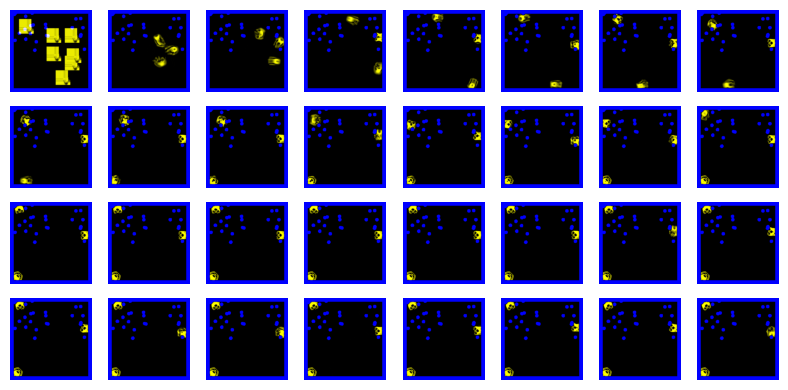

exit log_context_duration for Creating video
!!! {"Creating video": 5.982145547866821}
enter log_context_duration for Creating reversed video


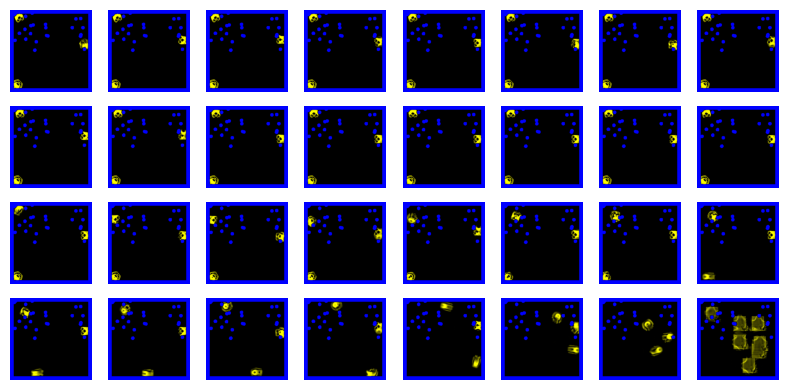

exit log_context_duration for Creating reversed video
!!! {"Creating reversed video": 5.732884645462036}


100%|██████████| 16/16 [00:05<00:00,  3.09it/s]


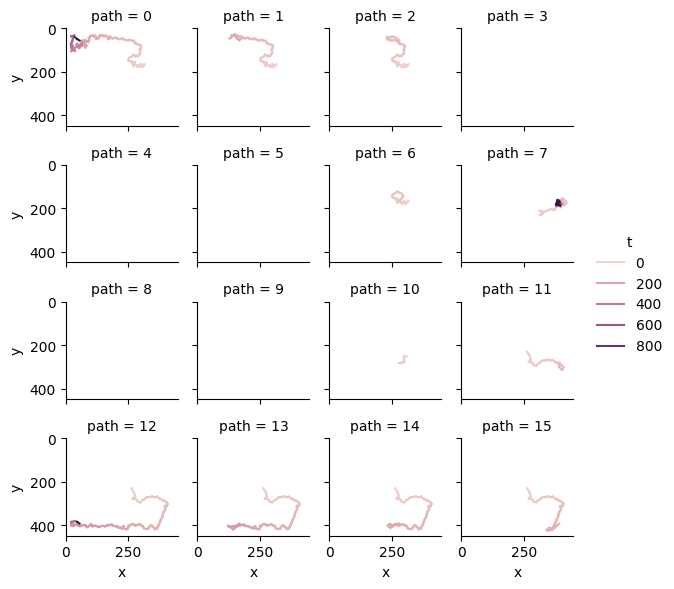

enter log_context_duration for Running Lenia
exit log_context_duration for Running Lenia
!!! {"Running Lenia": 19.756887197494507}
enter log_context_duration for Creating video


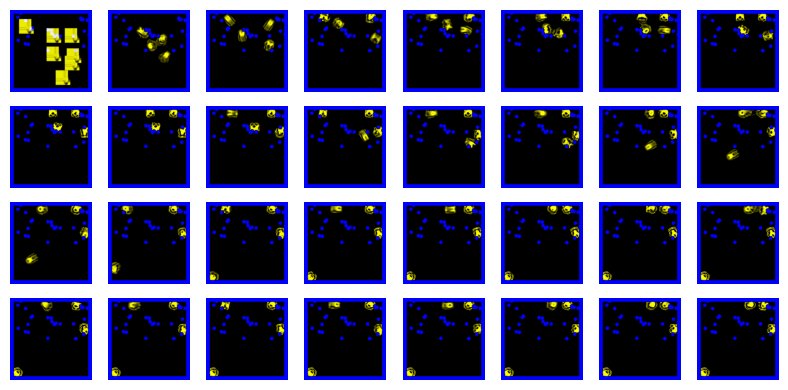

exit log_context_duration for Creating video
!!! {"Creating video": 6.054383277893066}
enter log_context_duration for Creating reversed video


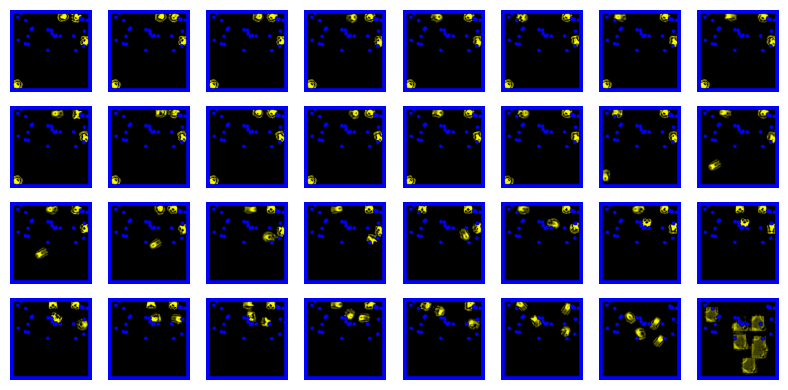

exit log_context_duration for Creating reversed video
!!! {"Creating reversed video": 5.383572340011597}


100%|██████████| 16/16 [00:05<00:00,  3.10it/s]


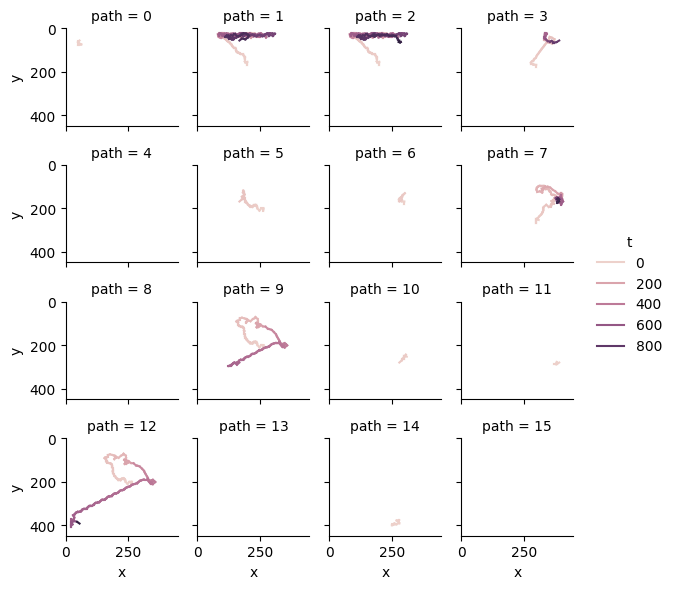

enter log_context_duration for Running Lenia
exit log_context_duration for Running Lenia
!!! {"Running Lenia": 20.288658142089844}
enter log_context_duration for Creating video


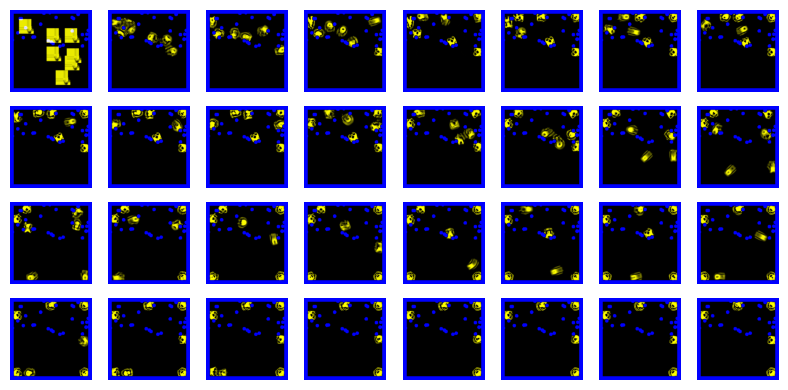

exit log_context_duration for Creating video
!!! {"Creating video": 5.702605962753296}
enter log_context_duration for Creating reversed video


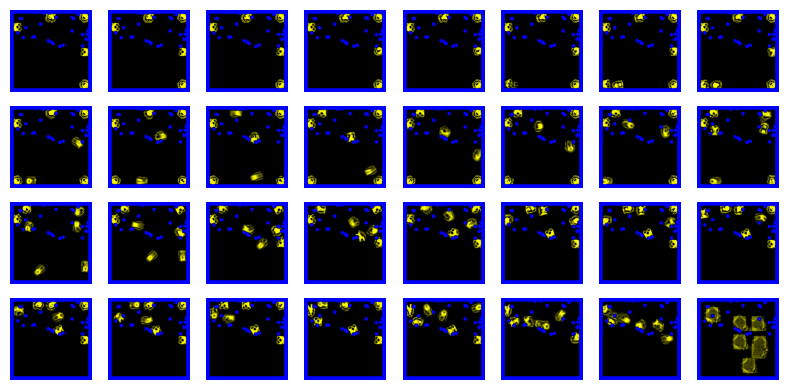

exit log_context_duration for Creating reversed video
!!! {"Creating reversed video": 5.883568286895752}


100%|██████████| 16/16 [00:05<00:00,  3.12it/s]


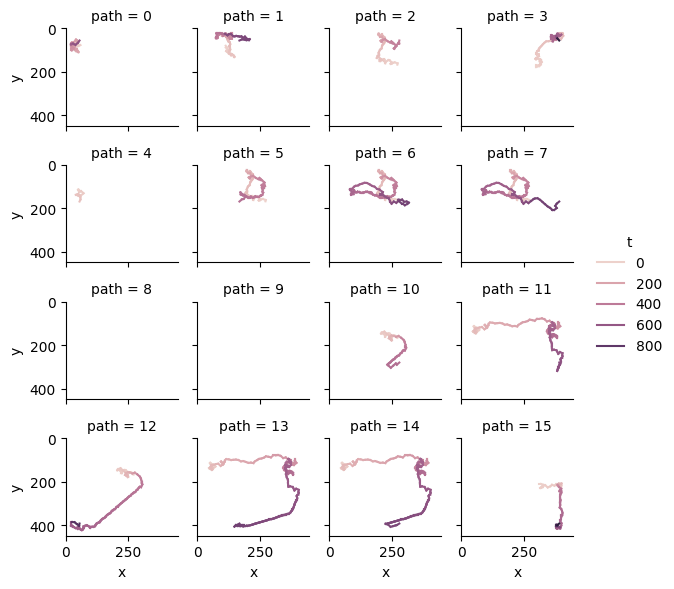

enter log_context_duration for Running Lenia
exit log_context_duration for Running Lenia
!!! {"Running Lenia": 21.741601705551147}
enter log_context_duration for Creating video


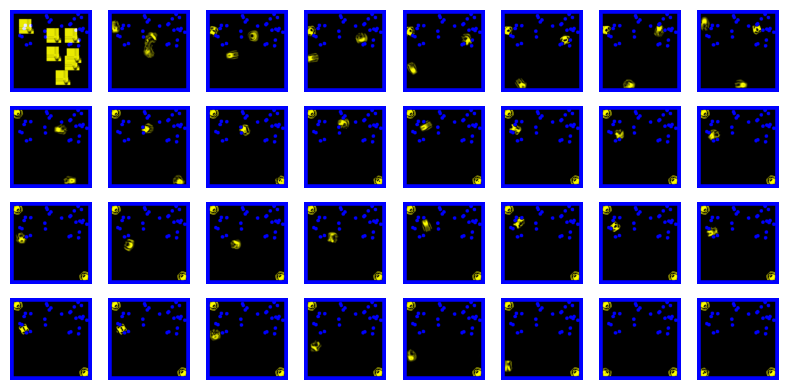

exit log_context_duration for Creating video
!!! {"Creating video": 5.674270153045654}
enter log_context_duration for Creating reversed video


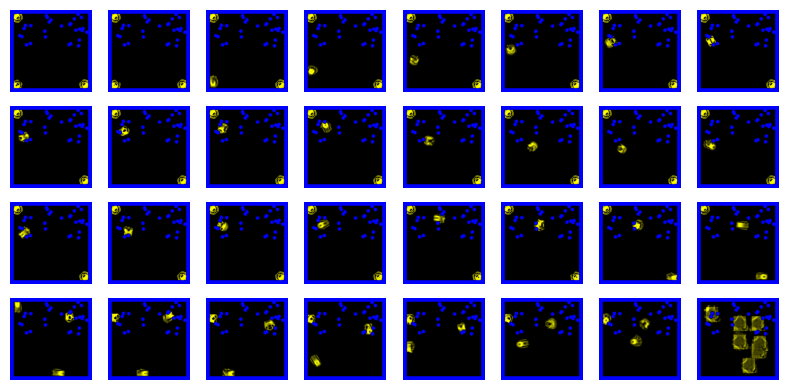

exit log_context_duration for Creating reversed video
!!! {"Creating reversed video": 5.662760019302368}


100%|██████████| 16/16 [00:05<00:00,  3.08it/s]


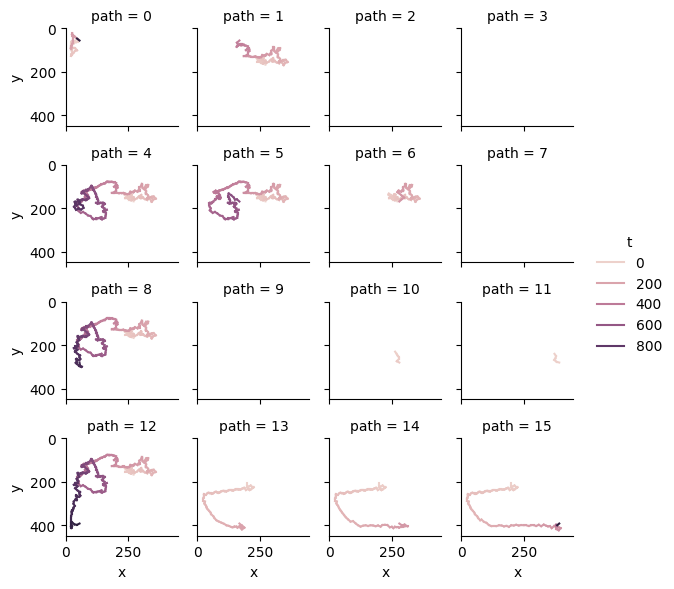

enter log_context_duration for Running Lenia
exit log_context_duration for Running Lenia
!!! {"Running Lenia": 20.11852717399597}
enter log_context_duration for Creating video


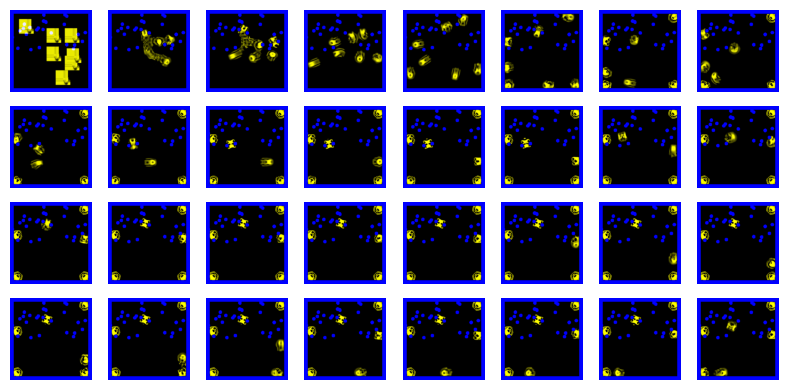

exit log_context_duration for Creating video
!!! {"Creating video": 6.637501239776611}
enter log_context_duration for Creating reversed video


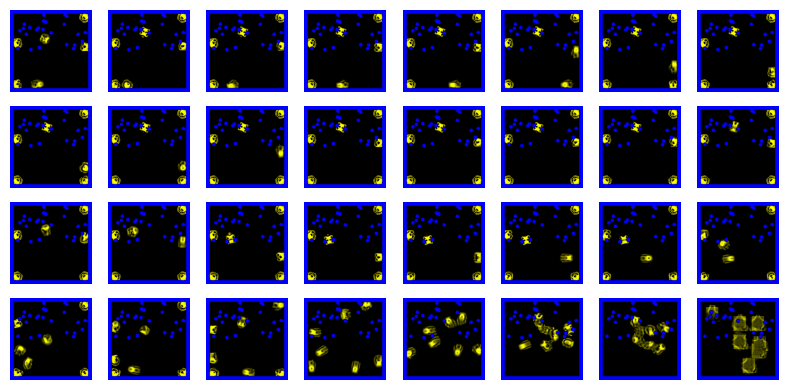

exit log_context_duration for Creating reversed video
!!! {"Creating reversed video": 5.85965633392334}


100%|██████████| 16/16 [00:05<00:00,  3.11it/s]


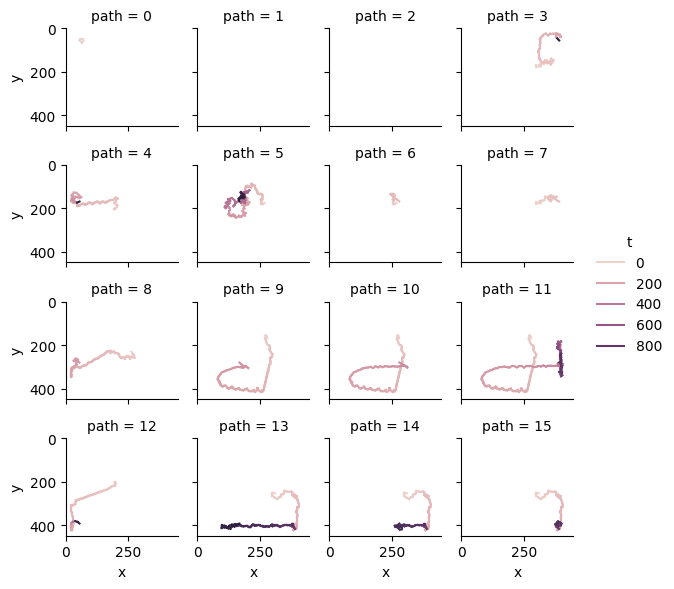

In [9]:
for i in range(5):
    obvs = show_sample_observations(
        SX,
        SY,
        borders=borders,
        crea_file="/tmp/crea1.pickle",
        device=device,
        logger=logger,
        mode=mode,
        num_frames=num_frames,
        zoom=1,
    )
    pathsplot(
        [
            build_path(
                coordinate,
                [state[:, :, 0] for state in obvs.states],
                AttributeBoxMax(10),
            )
            for coordinate in tqdm(seed_coordinates)
        ],
        xmax=SX,
        ymax=SY,
        col_wrap=4,
    )
    plt.show()


enter log_context_duration for Running Lenia
exit log_context_duration for Running Lenia
!!! {"Running Lenia": 19.97569251060486}
enter log_context_duration for Creating video


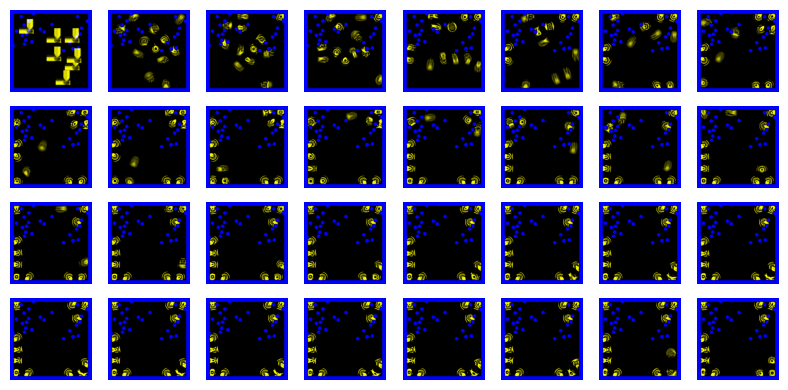

exit log_context_duration for Creating video
!!! {"Creating video": 6.194690704345703}
enter log_context_duration for Creating reversed video


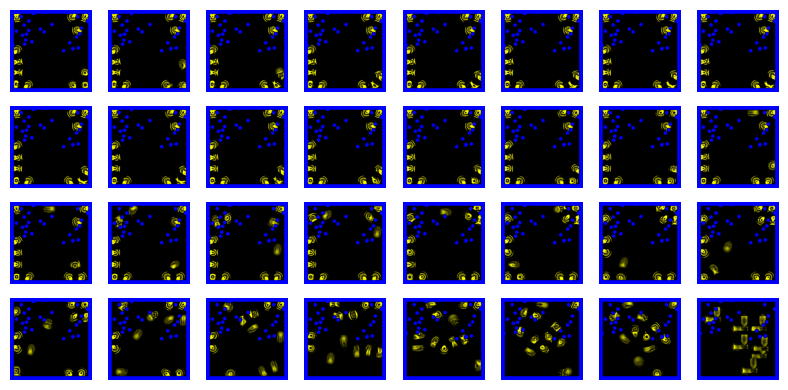

exit log_context_duration for Creating reversed video
!!! {"Creating reversed video": 6.2002482414245605}


100%|██████████| 16/16 [00:05<00:00,  3.11it/s]


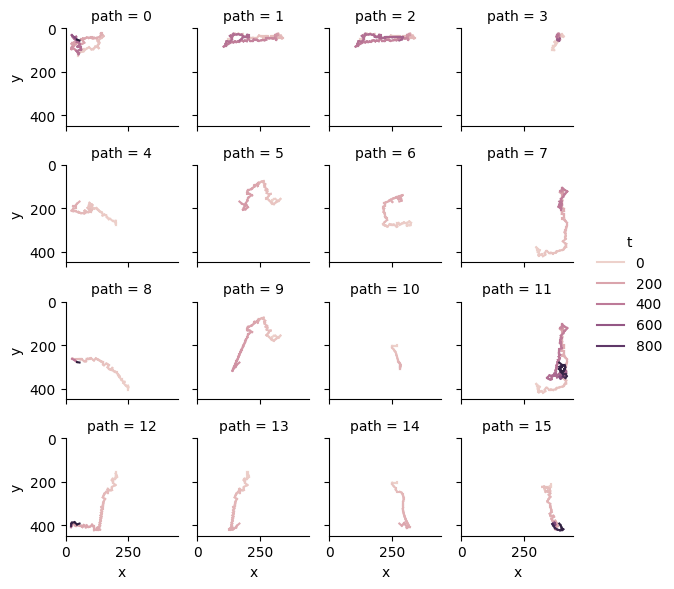

enter log_context_duration for Running Lenia
exit log_context_duration for Running Lenia
!!! {"Running Lenia": 19.33611011505127}
enter log_context_duration for Creating video


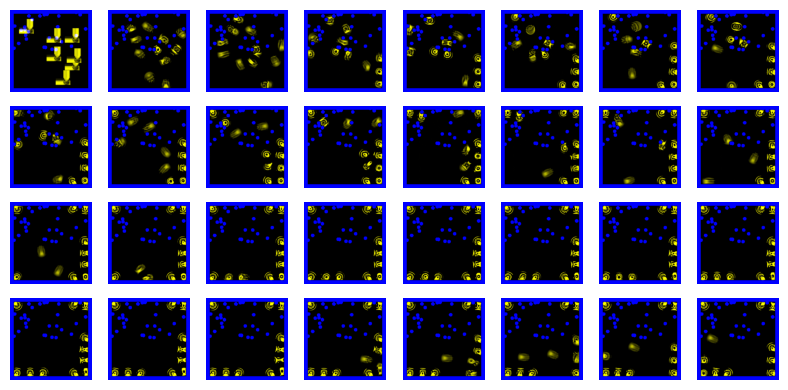

exit log_context_duration for Creating video
!!! {"Creating video": 6.186352014541626}
enter log_context_duration for Creating reversed video


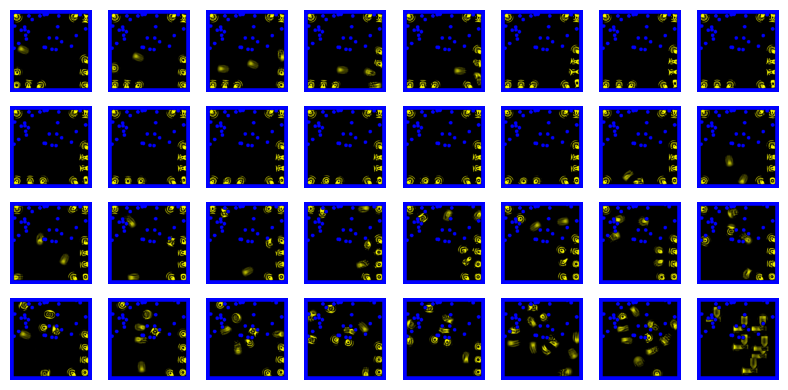

exit log_context_duration for Creating reversed video
!!! {"Creating reversed video": 6.187406301498413}


100%|██████████| 16/16 [00:05<00:00,  3.12it/s]


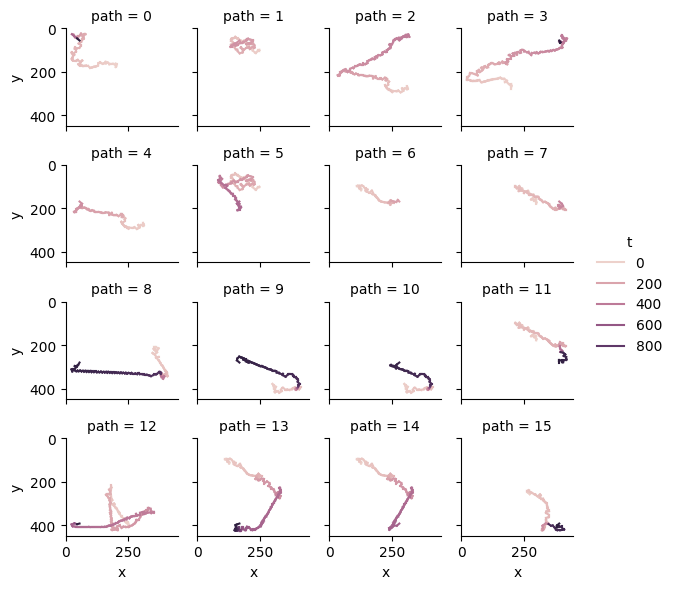

In [10]:
for i in range(2):
    obvs = show_sample_observations(
        SX,
        SY,
        borders=borders,
        crea_file="/tmp/crea2.pickle",
        device=device,
        logger=logger,
        mode=mode,
        num_frames=num_frames,
        zoom=1,
    )
    pathsplot(
        [
            build_path(
                coordinate,
                [state[:, :, 0] for state in obvs.states],
                AttributeBoxMax(10),
            )
            for coordinate in tqdm(seed_coordinates)
        ],
        xmax=SX,
        ymax=SY,
        col_wrap=4,
    )
    plt.show()
